# My Job Applications 2023

### Imports

In [104]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from collections import Counter
from dateutil.relativedelta import relativedelta

import json

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mpld

## Write Data

### Column Names

In [105]:
app_column_names = [
    'company_name', 'date_applied', 'job_title', 'job_cat', 'department',
    'location', 'recruiter', 'referral', 'method', 'url'
]
print(app_column_names)

['company_name', 'date_applied', 'job_title', 'job_cat', 'department', 'location', 'recruiter', 'referral', 'method', 'url']


### Apps

In [106]:
# company_app = [
#     'company_name', 'date_applied', 'job_title', 
#     'job_cat', 'department', 'location', 'recruiter', 
#     'referral', 'method', 'url'
# ]

In [107]:
# apps = [company_app]

In [108]:
# applications_df = pd.DataFrame(apps, columns=app_column_names)
# indexed_df = applications_df.set_index(['company_name', 'date_applied']).sort_index()

### First Responses

In [109]:
responses_cols = ['company_name', 'date_applied', 'date_init_resp', 'initial_response', 
                  'date_interview1', 'interviewers', 'interview_notes', 'next_steps', 'final_outcome']
print(responses_cols)

['company_name', 'date_applied', 'date_init_resp', 'initial_response', 'date_interview1', 'interviewers', 'interview_notes', 'next_steps', 'final_outcome']


#### Rejections

In [110]:
# company_fr = [
#     'company_name', 'date_applied', 'date_init_resp', 'initial_response'
# ]

In [111]:
# rejections = [company_fr]

#### Passed to First Interview

In [112]:
# company_fr = [
#     'company_name', 'date_applied', 'date_init_resp', 'initial_response', 
#     'date_interview1', 'interviewers'
# ]

In [113]:
# passed = [company_fr]

### Final Responses

#### Post-interview & Next Steps

In [114]:
# company_ns = ['interview_notes', 'next_steps']

In [115]:
# interviews = [company_ns]

In [116]:
# company_lr = 'final_outcome'

In [117]:
# final_responses = [company_lr]

### DFs

In [118]:
# fr_rej_df = pd.DataFrame(rejections, columns=responses_cols[:4])
# fr_rej_df.head(1)

In [119]:
# fr_pass_s = pd.DataFrame(passed, columns=responses_cols[:6])
# post_df = pd.DataFrame(interviews, columns=responses_cols[6:8])
# final_df = pd.DataFrame(final_responses, columns=responses_cols[-1])
# int_df = pd.concat([fr_pass_s, post_df, final_df], axis=1)
# int_df

In [120]:
# responses_df = pd.concat([fr_rej_df, int_df]).set_index(['company_name', 'date_applied'])
# responses_df

## Big DF

In [121]:
# new_jobs_df = indexed_df.join(responses_df)

#### No Response

In [122]:
# responses = ['No Response' if type(x) != str else x for x in new_jobs_df.initial_response]
# new_jobs_df.loc[:, 'initial_response'] = responses
# new_jobs_df

## Write new cols to df

In [123]:
old_jobs_df = pd.read_json('job_data.json', orient='table')
    
jobs_df = old_jobs_df

In [124]:
# jobs_df = old_jobs_df.join(new_jobs_df)
# result = new_jobs_df.to_json(orient='table')
# parsed = json.loads(result)

# with open("job_data.json", "w") as jsonFile:
#     json.dump(parsed, jsonFile, indent=4)

# with open("job_data.json", "r") as jsonFile:
#     jobs_df = json.load(jsonFile)

# jobs_df

## Visualizations

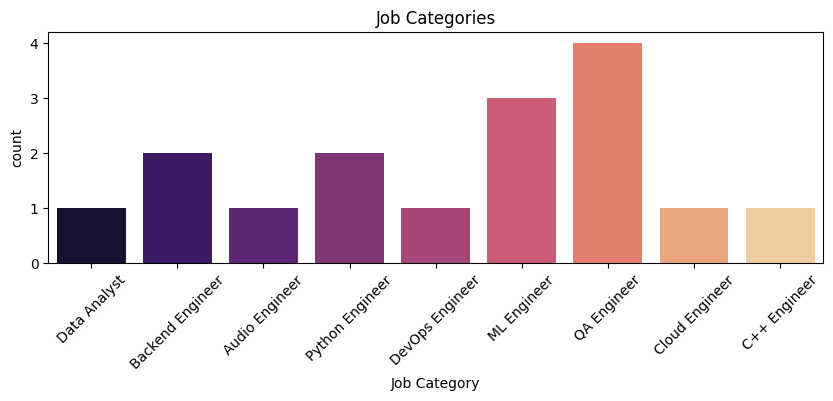

In [125]:
fig1, ax1 = plt.subplots(figsize=(10,3))
fig1 = sns.countplot(x=jobs_df.job_cat, palette='magma')
ax1.set_title('Job Categories')
ax1.set_xlabel('Job Category')
plt.xticks(rotation=45)
plt.show(fig1)

In [126]:
unique_dates = [pd.to_datetime(x).strftime('%Y-%m-%d') for x in jobs_df.index.unique('date_applied')]
my_dates = np.array(unique_dates, dtype='datetime64')
my_dates.sort()

In [127]:
date_grouped_df = jobs_df.loc[:, ['initial_response']].groupby(level='date_applied')
grouped_keys = list(date_grouped_df.groups.keys())

date_reject_counts = []
for key in grouped_keys:
    date_reject_counts.append(Counter(date_grouped_df.get_group(key).initial_response))

In [128]:
no_response = []
for x in date_reject_counts:
    no_response.append(x['No Response'])
rejected = []
for x in date_reject_counts:
    rejected.append(x['Rejected'])
passed = []
for x in date_reject_counts:
    passed.append(x['Passed'])
both = np.array(rejected) + np.array(no_response)
width = 1

In [129]:
x_lines = pd.date_range(
    pd.to_datetime(my_dates[0]) - relativedelta(days=5), 
    pd.to_datetime(my_dates[-1]) + relativedelta(days=2), freq='SMS'
)

x_labes = [x.strftime('%b %-d') for x in x_lines]

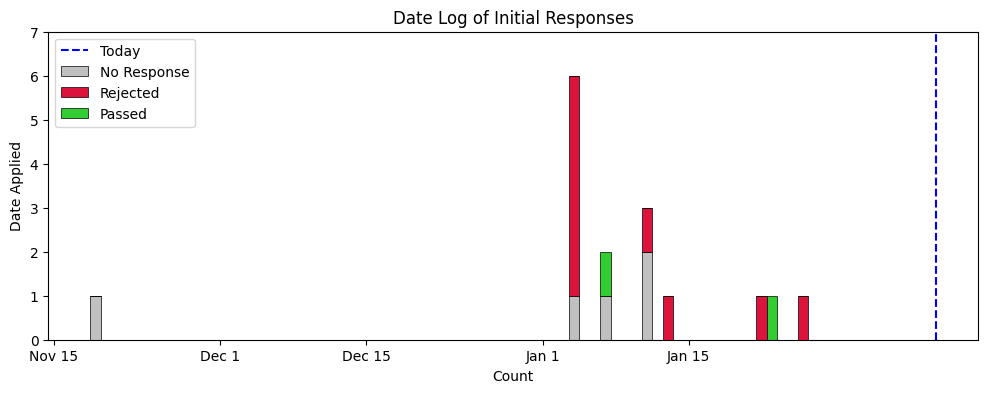

In [130]:
fig2, ax2 = plt.subplots(figsize=(12,4))

cat_palette = ['silver', 'crimson', 'limegreen']
ax2.bar(
    my_dates, no_response, width, label='No Response', 
    color=cat_palette[0], edgecolor='black', linewidth=0.5
)
ax2.bar(
    my_dates, rejected, width, bottom=no_response, label='Rejected', 
    color=cat_palette[1], edgecolor='black', linewidth=0.5
)
ax2.bar(
    my_dates, passed, width, bottom=both, label='Passed', 
    color=cat_palette[2], edgecolor='black', linewidth=0.5
)

l1 = ax2.vlines(
    datetime.today(), 0, 7, 
    linestyles='dashed', color='blue', label='Today'
)

ax2.set_xticks(x_lines)
ax2.set_xticklabels(x_labes)
ax2.set_ybound(0, 7)

ax2.set_xlabel('Count')
ax2.set_ylabel('Date Applied')
ax2.set_title('Date Log of Initial Responses')
ax2.legend(loc='upper left')

plt.show()

In [131]:
X = jobs_df.loc[:, ['initial_response']].reset_index('company_name', drop=True)
graph_df = X.groupby('date_applied').value_counts().unstack(fill_value=0)
graph_df.index.name = None

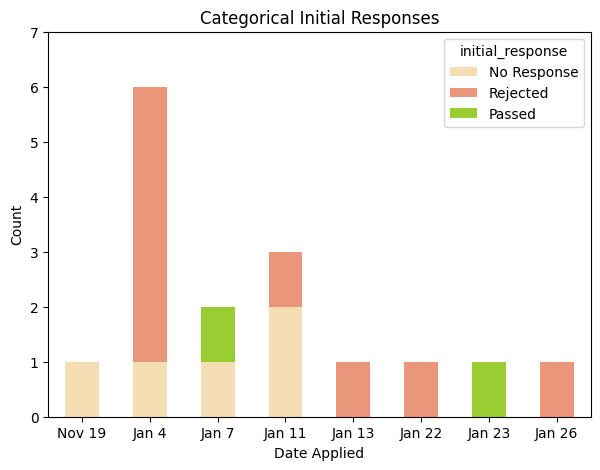

In [132]:
resp_graph = graph_df.loc[:, ['No Response', 'Rejected', 'Passed']].plot(
    figsize=(7,5),
    kind='bar', 
    stacked=True, 
    color={'No Response': 'wheat', 'Rejected': 'darksalmon', 'Passed': 'yellowgreen'},
    ylabel='Count',
    ylim=(0,7),
    xlabel='Date Applied',
    title='Categorical Initial Responses'
)

formatted_dates = [pd.to_datetime(x).strftime('%b %-d') for x in graph_df.index]
resp_graph.set_xticklabels(formatted_dates, rotation=0)

plt.show()